# **AUTHOR : Emanuel ALIDJINOU**

# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, i will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

# Train a Regression Model

My challenge is to explore and prepare the data, identify predictive features that will help predict the price_per_unit label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) i can achieve (which must be less than 7) when evaluated against a test subset of data.

# **Importing the necessary libraries for the task**

In [1]:
import os
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Display the dataset
url = "https://drive.google.com/uc?export=download&id=1ZAYW6tebqlzaSHGakIY1jdCZ3TOuU1z7"
df = pd.read_csv(url)
df

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


`My dataset contains the following variables`

### **The data consists of the following variables :**

* **transaction_date** – the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* **house_age** – the house age (in years)
* **transit_distance** the distance to the nearest light rail station (in meters)
* **local_convenience_stores** – the number of convenience stores within walking distance
* **latitude** – the geographic coordinate, latitude
* **longitude** – the geographic coordinate, longitude
* **price_per_unit** – house price of unit area (3.3 square meters)



In [3]:
# Dataset size
df.shape

(414, 7)

In [4]:
# General Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
# Checking for missing data
df.isna().sum()

,0
transaction_date,0
house_age,0
transit_distance,0
local_convenience_stores,0
latitude,0
longitude,0
price_per_unit,0


In [6]:
# Duplicate values checking
doub = df[df.duplicated()]
doub

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit


`The dataset contains 414 observations and 7 variables, with 6 of type float64 and 1 of type int64. There are no missing values and no duplicate rows`

# Distributions of variables

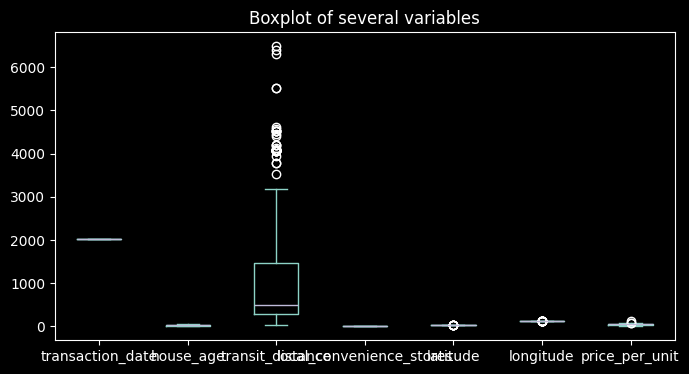

In [7]:
plt.style.use('dark_background')
df[['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit']].plot.box(figsize=(8,4))
plt.title("Boxplot of several variables")
plt.show()

# Distribution of each variable through a boxplot

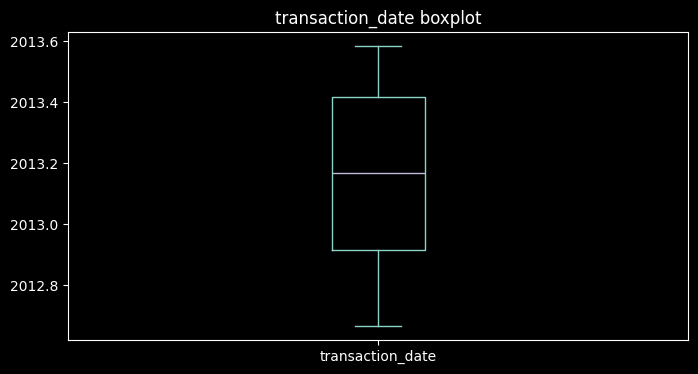

In [8]:
# transaction_date distribution
df['transaction_date'].plot.box(figsize=(8,4))
plt.title("transaction_date boxplot")
plt.show()

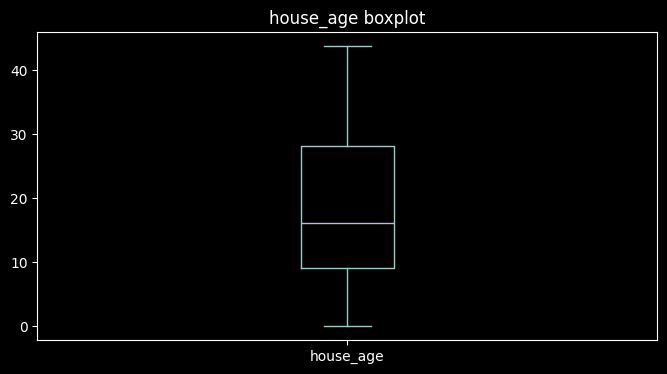

In [9]:
# house_age distribution
df['house_age'].plot.box(figsize=(8,4))
plt.title("house_age boxplot")
plt.show()

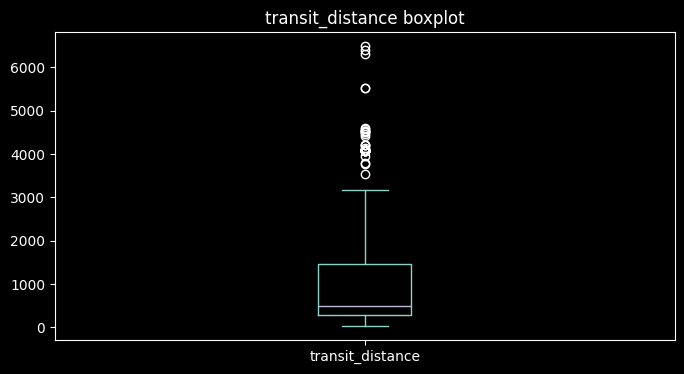

In [10]:
# transit_distance distribution
df['transit_distance'].plot.box(figsize=(8,4))
plt.title("transit_distance boxplot")
plt.show()

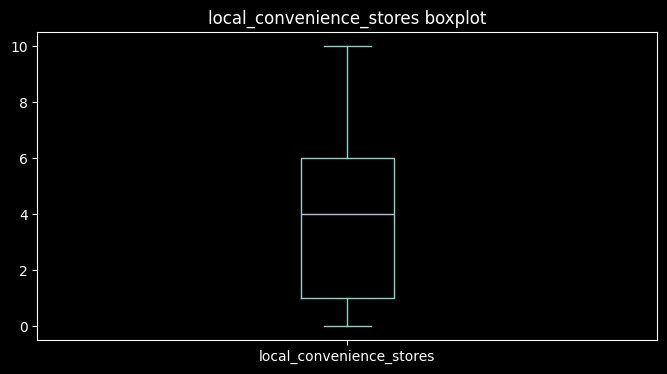

In [11]:
# local_convenience_stores distribution
df['local_convenience_stores'].plot.box(figsize=(8,4))
plt.title("local_convenience_stores boxplot")
plt.show()

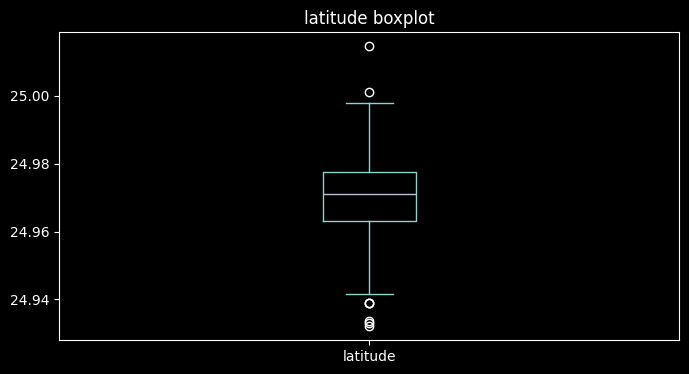

In [12]:
# latitude distribution
df['latitude'].plot.box(figsize=(8,4))
plt.title("latitude boxplot")
plt.show()

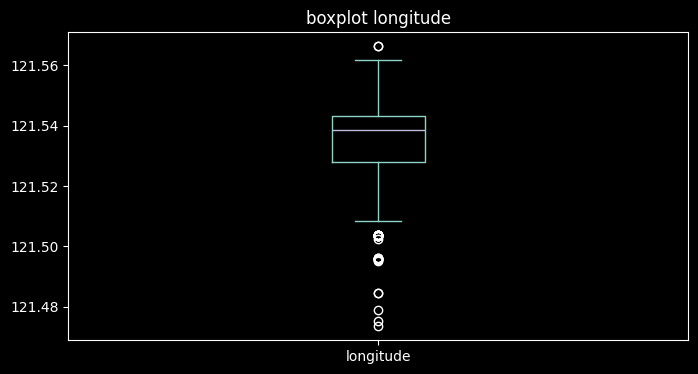

In [13]:
# Distributions de longitude
df['longitude'].plot.box(figsize=(8,4))
plt.title("boxplot longitude")
plt.show()

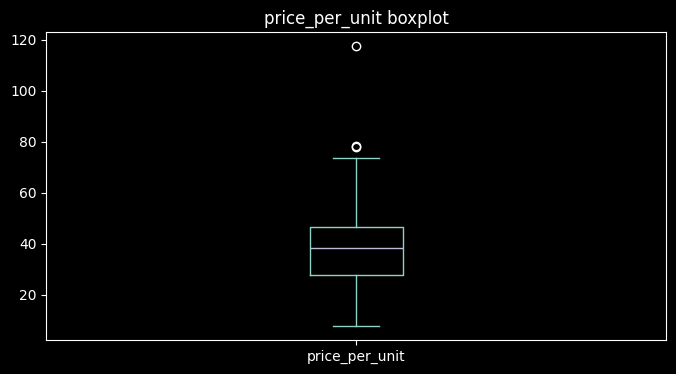

In [14]:
# price_per_unit distribution
df['price_per_unit'].plot.box(figsize=(8,4))
plt.title("price_per_unit boxplot")
plt.show()

In [15]:
df["price_per_unit"].describe().T

,price_per_unit
count,414.000000
mean,37.980193
std,13.606488
min,7.600000
25%,27.700000
50%,38.450000
75%,46.600000
max,117.500000


Descriptive statistics show that the average price per unit is **$37.98$** and the median is **$38.45$**.

The observation at **$117.50$** is a potential **outlier**, as it is more than three times higher than both the mean and the median.


# Removal of potential outlier values


=== PRICE_PER_UNIT ===
Q1 = 27.700, Q3 = 46.600, IQR = 18.900
Lower bound = -0.650, Upper bound = 74.950
Number of detected outliers: 3


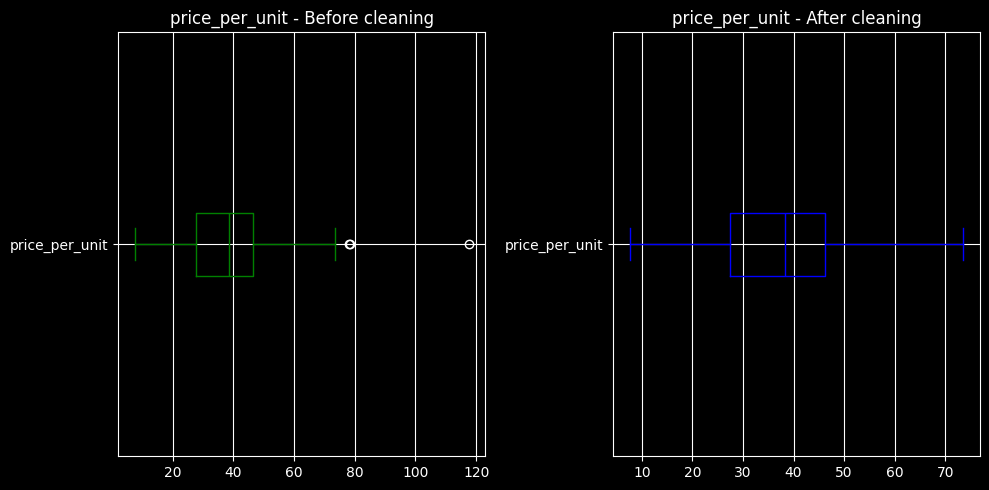


Initial dataset size: 414
Dataset size after cleaning: 411


In [16]:
# =====================================================
# Copy of the dataset
# =====================================================
df_clean = df.copy()

# Target variable
target = "price_per_unit"

# Calculation of quartiles and IQR
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1

# Determination of bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"=== {target.upper()} ===")
print(f"Q1 = {Q1:.3f}, Q3 = {Q3:.3f}, IQR = {IQR:.3f}")
print(f"Lower bound = {lower_bound:.3f}, Upper bound = {upper_bound:.3f}")

# Identify outliers
outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]
print(f"Number of detected outliers: {len(outliers)}")

# Remove outliers
df_clean = df_clean[(df_clean[target] >= lower_bound) & (df_clean[target] <= upper_bound)]

# Visualization before / after
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

df.boxplot(column=[target], vert=False, ax=axes[0], color="green")
axes[0].set_title(f"{target} - Before cleaning")

df_clean.boxplot(column=[target], vert=False, ax=axes[1], color="blue")
axes[1].set_title(f"{target} - After cleaning")

plt.tight_layout()
plt.show()

print(f"\nInitial dataset size: {len(df)}")
print(f"Dataset size after cleaning: {len(df_clean)}")


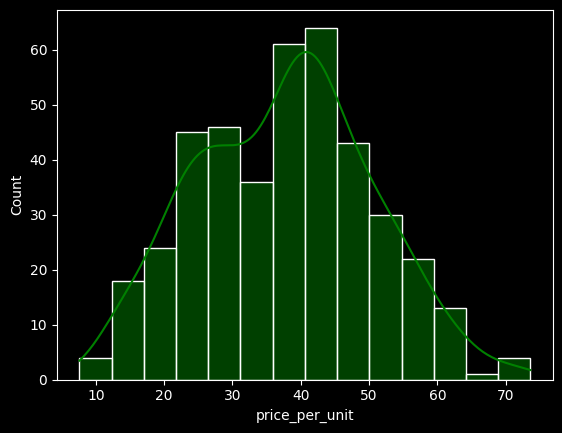

In [17]:
# Distribution of price_per_unit using a Histogram
sns.histplot(df_clean['price_per_unit'], kde=True, color='green')
plt.show()

In [18]:
# Checking the normality of price_per_unit
from scipy.stats import shapiro
stat, p = shapiro(df_clean['price_per_unit'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.992, p=0.023


*The distribution of price_per_unit is not statistically normal.*


In [19]:
df_ready = df_clean.copy()
df_ready.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_date,411.0,2013.147019,0.281884,2012.66700,2012.91700,2013.16700,2013.417000,2013.58300
house_age,411.0,17.638929,11.354608,0.00000,8.95000,16.10000,27.800000,43.80000
transit_distance,411.0,1089.953902,1264.697946,23.38284,289.32480,492.23130,1455.798000,6488.02100
local_convenience_stores,411.0,4.077859,2.932371,0.00000,1.00000,4.00000,6.000000,10.00000
latitude,411.0,24.968993,0.012446,24.93207,24.96299,24.97110,24.977705,25.01459
longitude,411.0,121.533328,0.015391,121.47353,121.52760,121.53863,121.543395,121.56627
price_per_unit,411.0,37.591241,12.768915,7.60000,27.50000,38.40000,46.300000,73.60000


#**Identification of variables for prediction.**


In [20]:
# Correlation matrix between variables.
mat_cor =  df_ready.corr()
mat_cor

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
transaction_date,1.000000,0.010083,0.065700,0.002447,0.032960,-0.043740,0.067013
house_age,0.010083,1.000000,0.030167,0.035385,0.052285,-0.053527,-0.242852
transit_distance,0.065700,0.030167,1.000000,-0.604710,-0.590426,-0.806768,-0.701349
local_convenience_stores,0.002447,0.035385,-0.604710,1.000000,0.446079,0.448211,0.605853
latitude,0.032960,0.052285,-0.590426,0.446079,1.000000,0.412657,0.571849
longitude,-0.043740,-0.053527,-0.806768,0.448211,0.412657,1.000000,0.554585
price_per_unit,0.067013,-0.242852,-0.701349,0.605853,0.571849,0.554585,1.000000


<Axes: >

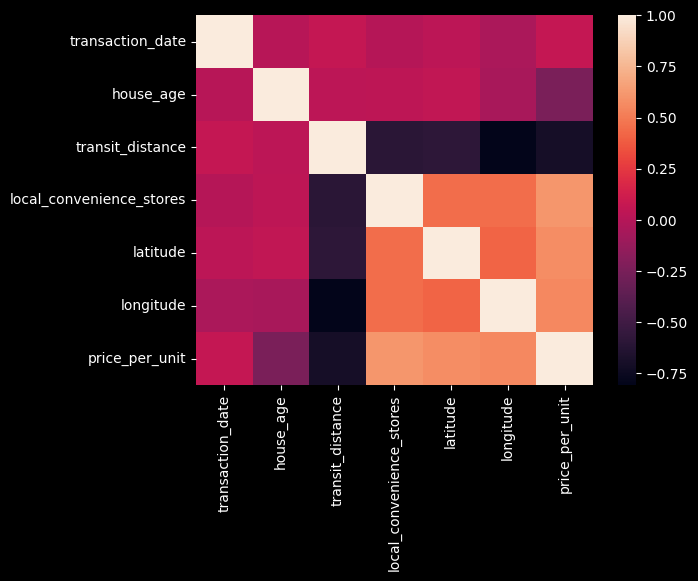

In [21]:
# Level of linear correlation between variables
import seaborn as sns
sns.heatmap(df_ready.corr(), annot=False)

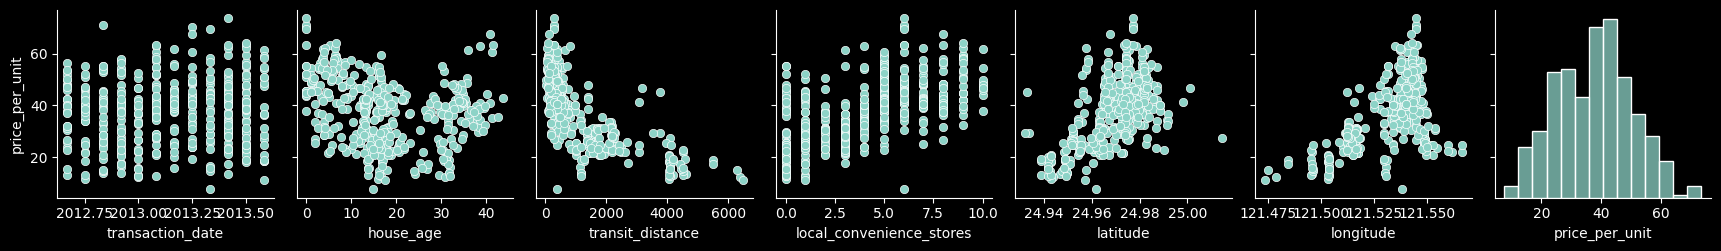

In [22]:
# Pairplot between predictor variables and the target variable
sns.pairplot(df_ready, y_vars="price_per_unit")

# Linear Regression Model


In [23]:
df_model = df_ready.copy()

In [24]:
# =====================================================
# Separation of features and target
# =====================================================
X = df_model.drop(columns=["price_per_unit","transaction_date"])
y = df_model["price_per_unit"]

# =====================================================
# Splitting into training (80%) and test (20%) sets
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 , random_state=2
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# =====================================================
# Normalization
# =====================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =====================================================
# Modeling (Linear Regression)
# =====================================================
model = LinearRegression()

# =====================================================
# Training the model on the training set
# =====================================================
model.fit(X_train_scaled, y_train)

# =====================================================
# Predictions on the test set
# =====================================================
y_test_pred = model.predict(X_test_scaled)

# =====================================================
# Model performance evaluation
# =====================================================
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n=== Model Performance ===")
print(f"RMSE (test)  : {rmse_test:.3f}")
print(f"R² (test)    : {r2_test:.3f}")

# =====================================================
# Model coefficients
# =====================================================
coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_
})

print("\n=== Model Coefficients ===")
print(coefficients)
print(f"\nIntercept : {model.intercept_:.3f}")

Training set size: (328, 5)
Test set size: (83, 5)

=== Model Performance ===
RMSE (test)  : 6.448
R² (test)    : 0.652

=== Model Coefficients ===
                   Variable  Coefficient
0                 house_age    -3.364249
1          transit_distance    -4.839526
2  local_convenience_stores     3.635946
3                  latitude     3.096618
4                 longitude     0.177536

Intercept : 37.125


# Save the model and the scaler

In [25]:
import joblib
# Saving the model and the scaler
joblib.dump(model, "model_price_unit.pkl")
joblib.dump(scaler, "scaler_price_unit.pkl")

['scaler_price_unit.pkl']

# Creating a DataFrame with the two new transactions

In [26]:
# New data to predict
new_data = pd.DataFrame({
    "house_age": [16.2, 13.6],
    "transit_distance": [289.3248, 4082.015],
    "local_convenience_stores": [5, 0],
    "latitude": [24.98203, 24.94155],
    "longitude": [121.54348, 121.50381]
})

print(new_data)

   house_age  transit_distance  local_convenience_stores  latitude  longitude
0       16.2          289.3248                         5  24.98203  121.54348
1       13.6         4082.0150                         0  24.94155  121.50381


# Normalize the new data and make predictions

In [27]:
# Load model and scaler
model_loaded = joblib.load("model_price_unit.pkl")
scaler_loaded = joblib.load("scaler_price_unit.pkl")

# Normalize the new data
new_data_scaled = scaler_loaded.transform(new_data)

# Prediction
predictions = model_loaded.predict(new_data_scaled)

print("\n=== Predictions for the new transactions ===")
for i, value in enumerate(predictions):
    print(f"Transaction {i+1} → Predicted price per unit: {value:.3f}")


=== Predictions for the new transactions ===
Transaction 1 → Predicted price per unit: 45.285
Transaction 2 → Predicted price per unit: 15.691
